[20220812]

# 0. Data Inspections

Brief inspections of the data.

## Goal
To check a summary of the data.

## Plan
Checklist what will be done on the notebook :

        [ ] Create an identifier column (if not exist)
        [ ] Or Creating Datamart if there are many resources
        [ ] Columns and Rows Counts
        [ ] Target Descriptions
        [ ] Possible Variable
        [ ] Train and Test separation

In [12]:
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import sys
sys.path.insert(1,'../../src/')

## import myfunc inside src folder
import myfunc 

In [2]:
with open("../../config.yaml", "r") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

PATH_RAW = config['path']['raw']
PATH_INTERIM = config['path']['interim']
PATH_PROCESSED = config['path']['processed']
PATH_MODEL = config['path']['artifact']+os.getcwd().split('\\')[-1]+'/'
PATH_UDF = config['path']['udf']

## Get Data

In [3]:
df = pd.read_csv(PATH_RAW+'daily-min-temperatures.csv')

In [4]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


## Check Identifier Column

Looking/Creating a column which seperate each rows.

In [5]:
df.shape

(3650, 2)

In [7]:
len(df.Date.unique())

3650

## Data Summary

In [8]:
df.describe()

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


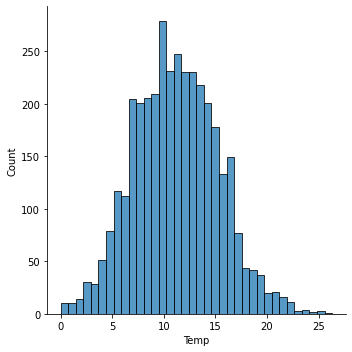

In [14]:
sns.displot(df.Temp)

In [17]:
df.Date.min(), df.Date.max()

('1981-01-01', '1990-12-31')

In [20]:
df2 = df.sort_values('Date')

In [22]:
df2.tail(int(df.shape[0]*0.2)).min()

Date    1989-01-01
Temp           0.5
dtype: object

## Save to Interim

Seperate the data (Train and Test) to interim folder

In [24]:
df2['is_future'] = df2.Date >= '1989-01-01'

In [25]:
df2.to_csv(PATH_INTERIM + 'daily-min-temp2_iter0.csv',index = False)